# Example script: load LE data and plot GSAT

This is a basic script that loads output from a large ensemble, does some simple processing, and plots the result.

Make sure that preprocessing with bash/cdo script has been run.


**Please use the *Pangeo (2019.09.12 - py3.7)* environment.** The standard Python 3 environment does not provide all necessary packages. Of course you can also use your own custom environment.

## Setup
### load required packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import numpy as np
# from scipy.io import netcdf
# import scipy.stats as stats
import pandas as pd

import xarray as xr
# import random
import os
from pprint import pprint
from tqdm import tqdm

# # Import Cdo-py
import cdo
cdo = cdo.Cdo() #


    


## set paths

In [2]:
# directories with SMILE output
basedir_MMLEA = '/glade/collections/cdg/data/CLIVAR_LE/'
basedir_cmip6_ensembles = '/glade/scratch/rwills/cmip6_ensembles/'

# directories with processed output
basedir_processed_MMLEA = '/glade/scratch/milinski/'
# directory for saving plots
plotdir = './plots/test/'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
    



## List available data

In [5]:
# list contents of MMLEA archive
[f for f in os.listdir(basedir_processed_MMLEA) if not f.startswith(('.'))]

['tas_Amon_CESM1-CAM5_historical_rcp85_r37i1p1_192001-210012_fldmean.nc',
 'ipykernel_254355',
 'MPI-GE',
 'cesm_yearmean_test.nc',
 'cesm_yearmean_fldmean_test.nc',
 'canesm2_r1_GSAT.nc',
 'CESM-LENS',
 'CanESM2',
 'conda',
 'test_r2.nc']

In [6]:
# list available CMIP SMILEs

# ignores hidden files and folder with temporary data
[f for f in os.listdir(basedir_cmip6_ensembles) if not f.startswith(('.','model_variants','native_grid','unsorted'))]


['ec-earth3_lens',
 'ukesm1_lens',
 'giss_e21h_lens',
 'cnrm_cm6_lens',
 'miroc6_lens',
 'norcpm1_lens',
 'cesm2_lens',
 'canesm5_lens',
 'access_lens',
 'giss_e21g_lens',
 'miroc_esm2l_lens',
 'ipsl_cm6a_lens']

In [7]:
# explore MPI-GE data in more detail
filelist = os.listdir(basedir_processed_MMLEA+'MPI-GE/global_mean/')
filelist.sort()
pprint(filelist)

['tas_mpi-ge_r100i1p1_globalmean.nc',
 'tas_mpi-ge_r10i1p1_globalmean.nc',
 'tas_mpi-ge_r11i1p1_globalmean.nc',
 'tas_mpi-ge_r12i1p1_globalmean.nc',
 'tas_mpi-ge_r13i1p1_globalmean.nc',
 'tas_mpi-ge_r14i1p1_globalmean.nc',
 'tas_mpi-ge_r15i1p1_globalmean.nc',
 'tas_mpi-ge_r16i1p1_globalmean.nc',
 'tas_mpi-ge_r17i1p1_globalmean.nc',
 'tas_mpi-ge_r18i1p1_globalmean.nc',
 'tas_mpi-ge_r19i1p1_globalmean.nc',
 'tas_mpi-ge_r1i1p1_globalmean.nc',
 'tas_mpi-ge_r20i1p1_globalmean.nc',
 'tas_mpi-ge_r21i1p1_globalmean.nc',
 'tas_mpi-ge_r22i1p1_globalmean.nc',
 'tas_mpi-ge_r23i1p1_globalmean.nc',
 'tas_mpi-ge_r24i1p1_globalmean.nc',
 'tas_mpi-ge_r25i1p1_globalmean.nc',
 'tas_mpi-ge_r26i1p1_globalmean.nc',
 'tas_mpi-ge_r27i1p1_globalmean.nc',
 'tas_mpi-ge_r28i1p1_globalmean.nc',
 'tas_mpi-ge_r29i1p1_globalmean.nc',
 'tas_mpi-ge_r2i1p1_globalmean.nc',
 'tas_mpi-ge_r30i1p1_globalmean.nc',
 'tas_mpi-ge_r31i1p1_globalmean.nc',
 'tas_mpi-ge_r32i1p1_globalmean.nc',
 'tas_mpi-ge_r33i1p1_globalmean.nc',
 '

## load MPI-GE

In [9]:
var = 'tas'
filepath = basedir_processed_MMLEA + 'MPI-GE/global_mean/'

mpi_ge_tas = xr.open_mfdataset(filepath + '*.nc',combine='nested',concat_dim='ensemble')[var]

In [10]:
mpi_ge_tas

,Array,Chunk
Bytes,1.14 MiB,11.72 kiB
Shape,"(100, 3000, 1, 1)","(1, 3000, 1, 1)"
Count,400 Tasks,100 Chunks
Type,float32,numpy.ndarray


### plot GSAT

In [11]:
# compute annual mean
mpi_ge_tas_globalmean = mpi_ge_tas.groupby('time.year').mean('time').squeeze()

In [12]:
mpi_ge_tas_globalmean

<xarray.DataArray 'tas' (ensemble: 100, year: 250)>
dask.array<getitem, shape=(100, 250), dtype=float32, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
    lon      float64 0.0
    lat      float64 0.0
    height   float64 2.0
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2095 2096 2097 2098 2099
Dimensions without coordinates: ensemble

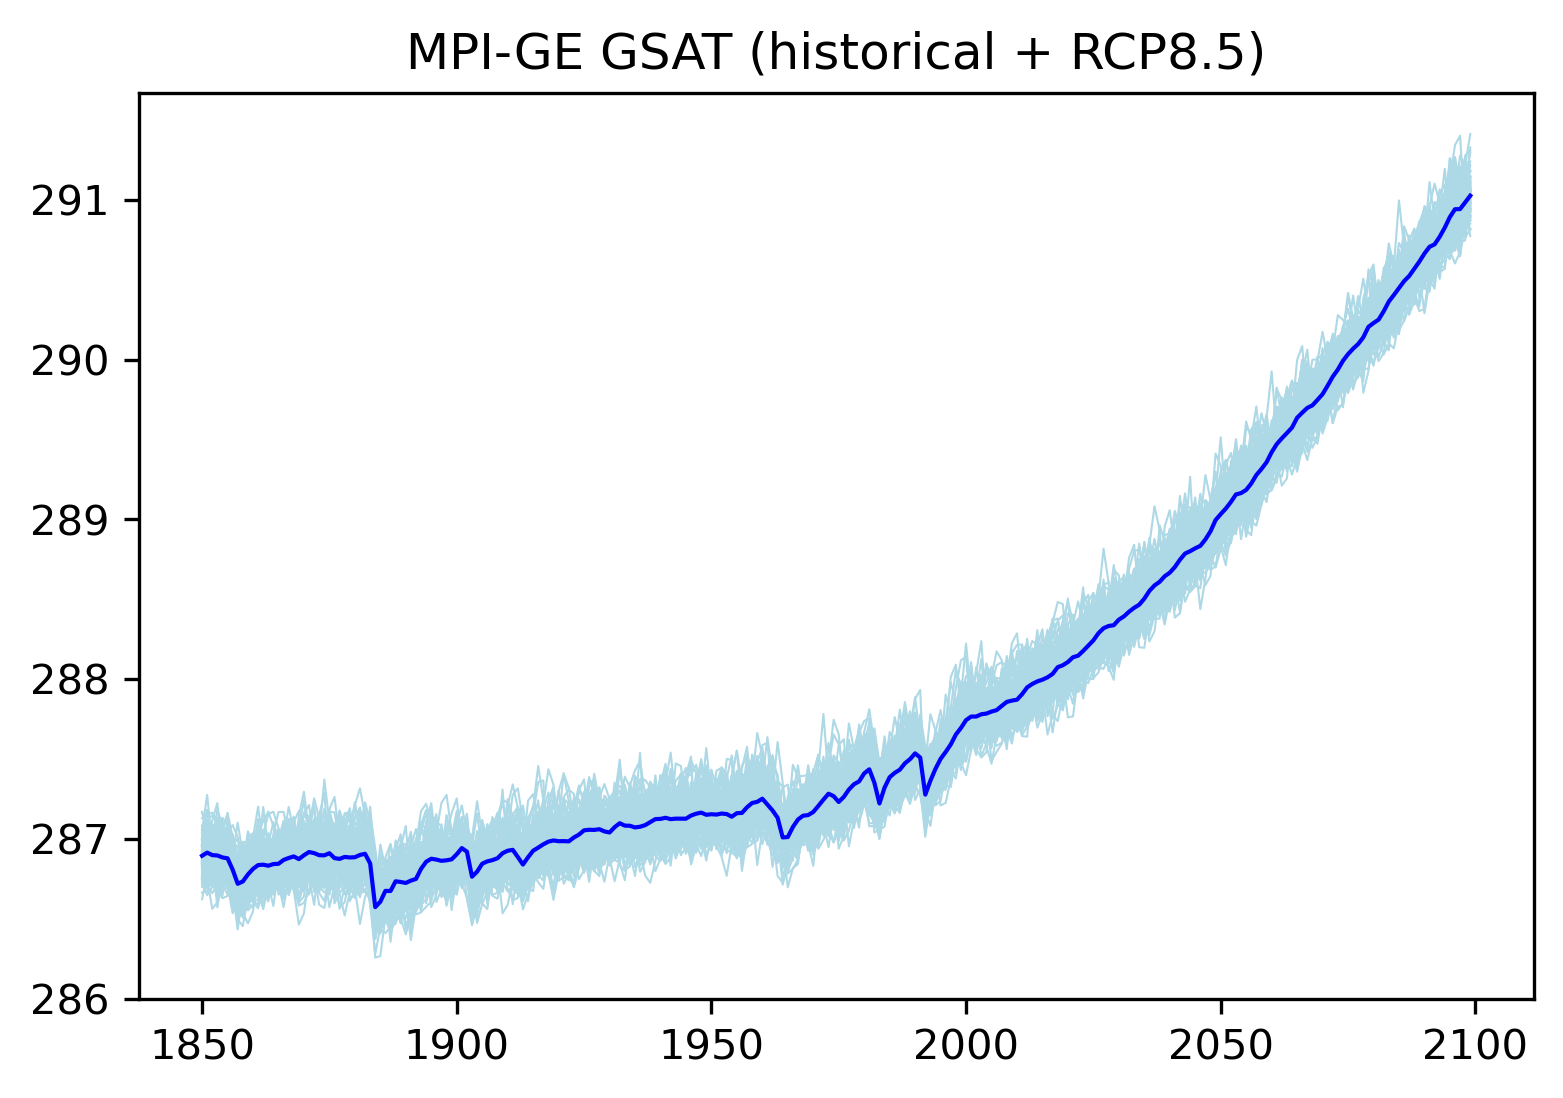

In [13]:
plt.plot(mpi_ge_tas_globalmean['year'],mpi_ge_tas_globalmean.transpose(),color='lightblue',linewidth=0.5);
plt.plot(mpi_ge_tas_globalmean['year'],mpi_ge_tas_globalmean.mean(dim='ensemble'),color='blue',linewidth=1);
plt.title('MPI-GE GSAT (historical + RCP8.5)')

plt.savefig(plotdir+'GSAT_MPI-GE.pdf', bbox_inches='tight', dpi=300)

## load CanESM2

In [17]:
var = 'tas'
filepath = basedir_processed_MMLEA + 'CanESM2/global_mean/'

canesm2_tas = xr.open_mfdataset(filepath + '*.nc',combine='nested',concat_dim='ensemble')[var]

In [18]:
canesm2_tas

,Array,Chunk
Bytes,353.91 kiB,7.08 kiB
Shape,"(50, 1812, 1, 1)","(1, 1812, 1, 1)"
Count,200 Tasks,50 Chunks
Type,float32,numpy.ndarray


### plot GSAT

In [19]:
# compute annual mean
canesm2_tas_globalmean = mpi_ge_tas.groupby('time.year').mean('time').squeeze()

In [20]:
canesm2_tas_globalmean

<xarray.DataArray 'tas' (ensemble: 100, year: 250)>
dask.array<getitem, shape=(100, 250), dtype=float32, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
    lon      float64 0.0
    lat      float64 0.0
    height   float64 2.0
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2095 2096 2097 2098 2099
Dimensions without coordinates: ensemble

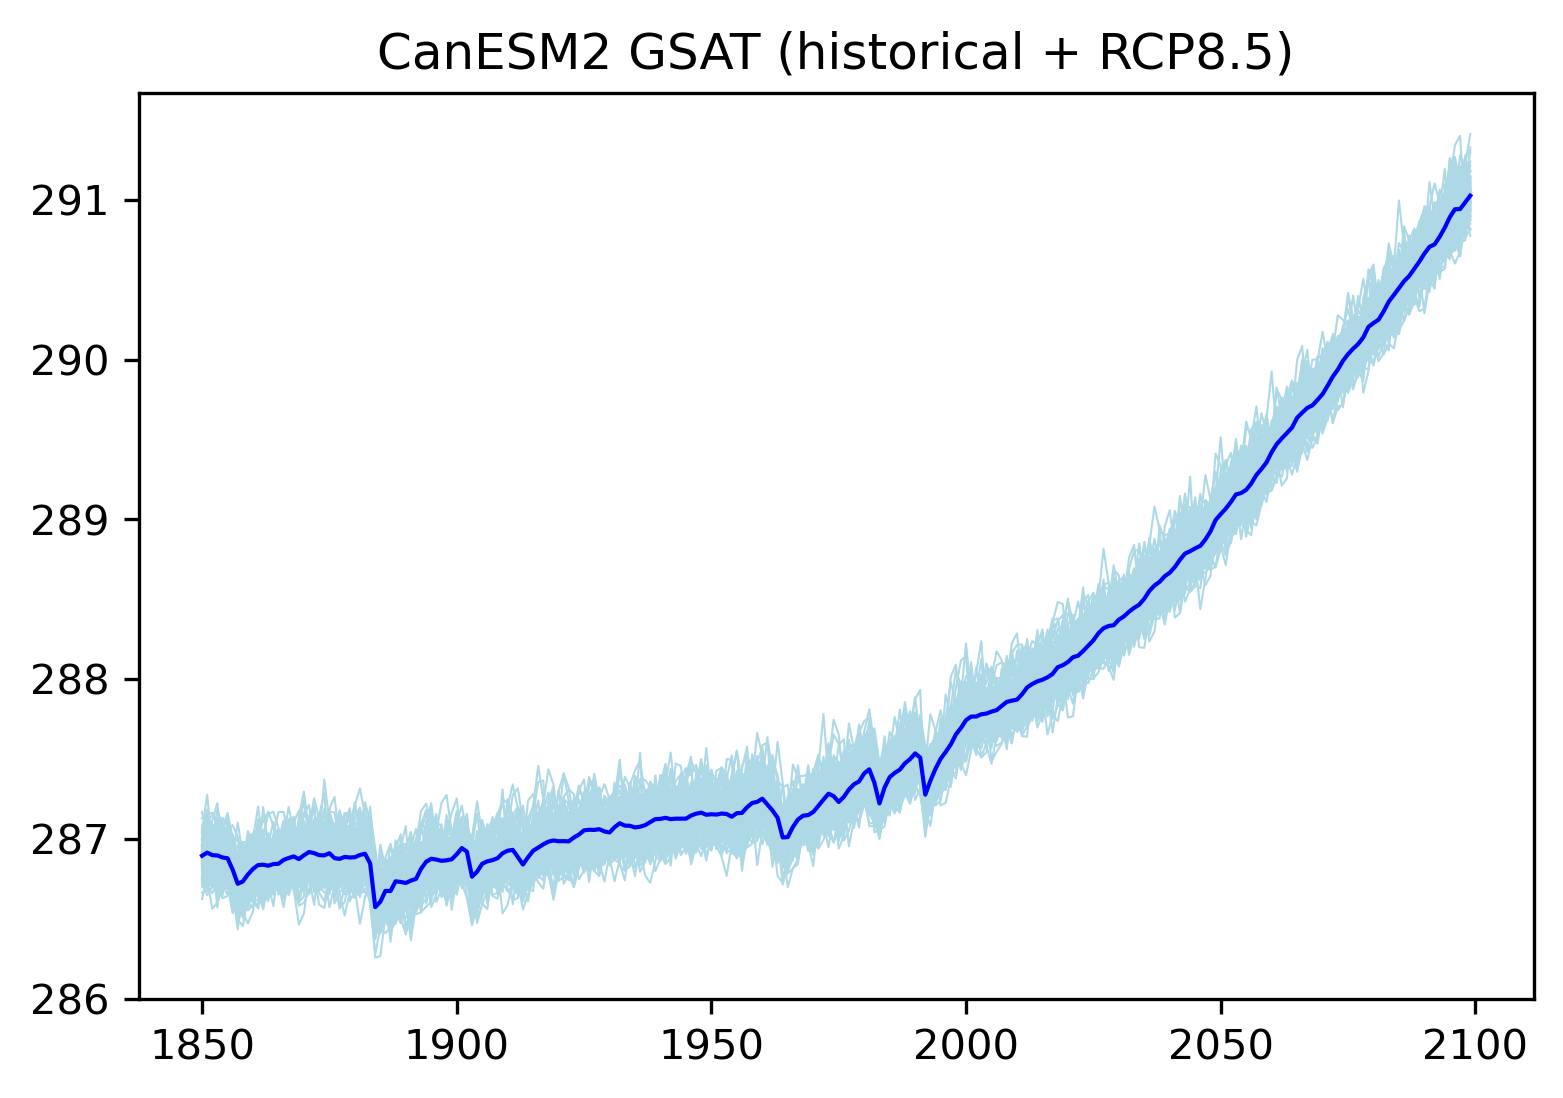

In [21]:
plt.plot(canesm2_tas_globalmean['year'],canesm2_tas_globalmean.transpose(),color='lightblue',linewidth=0.5);
plt.plot(canesm2_tas_globalmean['year'],canesm2_tas_globalmean.mean(dim='ensemble'),color='blue',linewidth=1);
plt.title('CanESM2 GSAT (historical + RCP8.5)')
plt.savefig(plotdir+'GSAT_CanESM2.pdf', bbox_inches='tight', dpi=300)